# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

### Tratando os dados faltantes:

In [8]:
# Substituindo "?" por NaN:
df.replace('?', np.nan, inplace=True)

# Verificando valores ausentes:
print(df.isnull().sum())

# Convertendo colunas para os tipos adequados:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Verificando novamente os valores ausentes:
print(df.isnull().sum())

# Decisão de tratamento de valores ausentes:
# Podemos optar por preencher os valores ausentes ou remover as linhas faltantes
df.dropna(inplace=True)  # Removendo as linhas com valores ausentes

# Conferindo se os dados faltantes foram removidos:
df.info()


age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             4
thal           2
num            0
flag_doente    0
dtype: int64
age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             4
thal           2
num            0
flag_doente    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   sex          297 non-null    float64
 2   cp           297 non-null    float64
 3   trestbps     297 non-null    float64
 4   chol         297 non-null    float64
 5   fbs          297 non-null    float64
 6   restecg      297 non-nu

### Transformando a análise bivariada em função:

In [10]:
def analise_bivariada(df, resposta, explicativa):
    # Agrupar os dados pela variável explicativa e calcular saudáveis e doentes
    bivariada = df.groupby(explicativa).agg(
        saudaveis=(resposta, lambda x: (x == 0).sum()),
        doentes=(resposta, lambda x: (x == 1).sum()),
        total=(resposta, 'size')
    )

    # Quantidade média de doentes (proporção de doentes)
    bivariada['media_doentes'] = bivariada['doentes'] / bivariada['total']

    # Odds (razão entre doentes e saudáveis)
    bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

    # Total de saudáveis e doentes (para referência)
    total_saudaveis = df[resposta].value_counts()[0]
    total_doentes = df[resposta].value_counts()[1]

    # Odds total (para ser a referência no cálculo do Odds Ratio)
    odds_total = total_doentes / total_saudaveis

    # Odds ratio (comparação das odds de cada grupo com o total)
    bivariada['odds_ratio'] = bivariada['odds'] / odds_total

    # Logito (log das odds)
    bivariada['logito'] = np.log(bivariada['odds'])

    # Weight of Evidence (log do odds ratio)
    bivariada['woe'] = np.log(bivariada['odds_ratio'])

    return bivariada


### Aplicando a função a três variáveis qualitativas: sex, cp, e fbs:

In [12]:
# Aplicar a função às variáveis qualitativas
bivariada_sex = analise_bivariada(df, 'flag_doente', 'sex')
bivariada_cp = analise_bivariada(df, 'flag_doente', 'cp')
bivariada_fbs = analise_bivariada(df, 'flag_doente', 'fbs')

print(bivariada_sex)
print(bivariada_cp)
print(bivariada_fbs)


     saudaveis  doentes  total  media_doentes      odds  odds_ratio    logito  \
sex                                                                             
0.0         71       25     96       0.260417  0.352113    0.411226 -1.043804   
1.0         89      112    201       0.557214  1.258427    1.469696  0.229863   

          woe  
sex            
0.0 -0.888611  
1.0  0.385055  
     saudaveis  doentes  total  media_doentes      odds  odds_ratio    logito  \
cp                                                                              
1.0         16        7     23       0.304348  0.437500    0.510949 -0.826679   
2.0         40        9     49       0.183673  0.225000    0.262774 -1.491655   
3.0         65       18     83       0.216867  0.276923    0.323414 -1.284016   
4.0         39      103    142       0.725352  2.641026    3.084410  0.971167   

          woe  
cp             
1.0 -0.671486  
2.0 -1.336462  
3.0 -1.128823  
4.0  1.126360  
     saudaveis  doentes  tot

In [13]:
bivariada_sex

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,woe
sex,,,,,,,,
0.0,71,25,96,0.260417,0.352113,0.411226,-1.043804,-0.888611
1.0,89,112,201,0.557214,1.258427,1.469696,0.229863,0.385055


In [14]:
bivariada_cp

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,woe
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.510949,-0.826679,-0.671486
2.0,40,9,49,0.183673,0.225000,0.262774,-1.491655,-1.336462
3.0,65,18,83,0.216867,0.276923,0.323414,-1.284016,-1.128823
4.0,39,103,142,0.725352,2.641026,3.084410,0.971167,1.126360


In [15]:
bivariada_fbs

,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,woe
fbs,,,,,,,,
0.0,137,117,254,0.460630,0.854015,0.997389,-0.157807,-0.002614
1.0,23,20,43,0.465116,0.869565,1.015551,-0.139762,0.015431


##### Constatamos que a variável fbs parece discriminar mais o risco, se levarmos em consideração a média de doentes e a odds_ratio(que está mais perto de 1). 

### Análise visual:

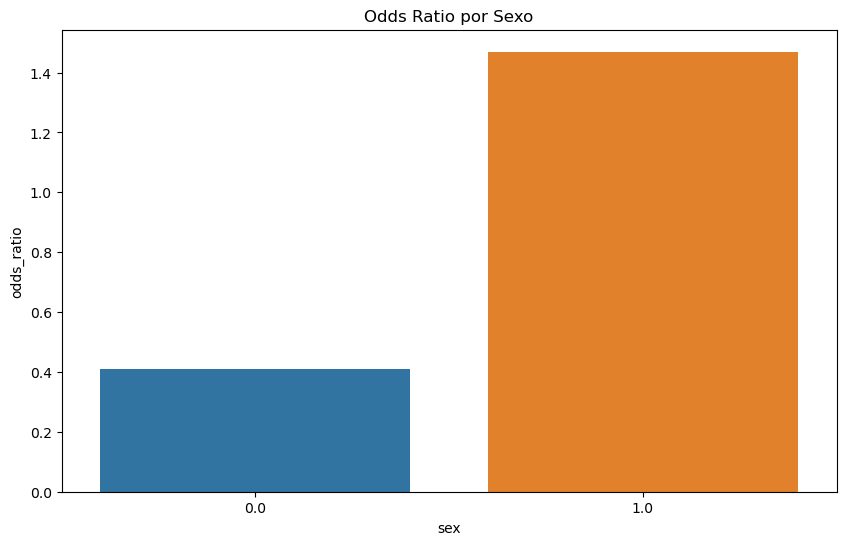

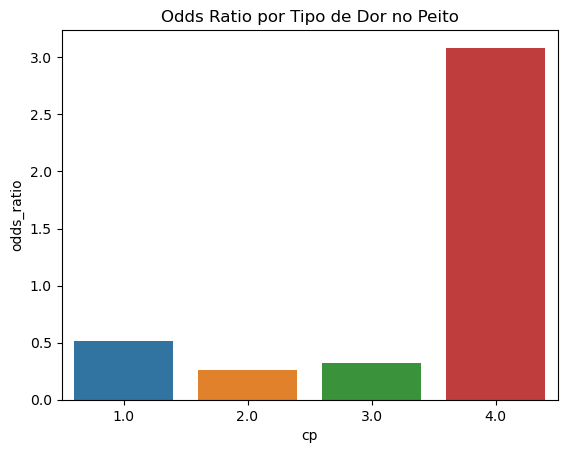

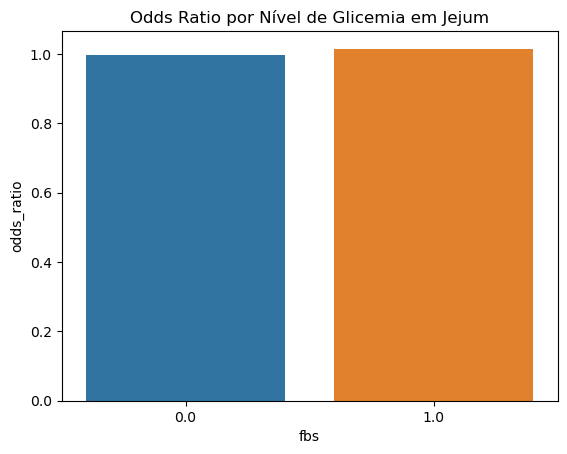

In [18]:
# Comparação visual de odds ratio:
plt.figure(figsize=(10, 6))

sns.barplot(x=bivariada_sex.index, y=bivariada_sex['odds_ratio'])
plt.title('Odds Ratio por Sexo')
plt.show()

sns.barplot(x=bivariada_cp.index, y=bivariada_cp['odds_ratio'])
plt.title('Odds Ratio por Tipo de Dor no Peito')
plt.show()

sns.barplot(x=bivariada_fbs.index, y=bivariada_fbs['odds_ratio'])
plt.title('Odds Ratio por Nível de Glicemia em Jejum')
plt.show()


____

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

### Usando a função pd.cut:

In [22]:
def analise_bivariada_continua(df, resposta, explicativa, num_grupos=5):
    # Categorizar a variável contínua em 'num_grupos' grupos
    df[explicativa + '_cat'] = pd.cut(df[explicativa], bins=num_grupos, labels=False)

    # Agrupar os dados pela variável categorizada
    bivariada = df.groupby(explicativa + '_cat').agg(
        saudaveis=(resposta, lambda x: (x == 0).sum()),
        doentes=(resposta, lambda x: (x == 1).sum()),
        total=(resposta, 'size')
    )

    # Calculando as proporções de doentes e as odds:
    bivariada['media_doentes'] = bivariada['doentes'] / bivariada['total']
    bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

    # Total de saudáveis e doentes:
    total_saudaveis = df[resposta].value_counts()[0]
    total_doentes = df[resposta].value_counts()[1]

    # Odds total para referência:
    odds_total = total_doentes / total_saudaveis

    # Calculando o Odds Ratio e logito:
    bivariada['odds_ratio'] = bivariada['odds'] / odds_total
    bivariada['logito'] = np.log(bivariada['odds'])

    # Calculando o Weight of Evidence (WoE):
    bivariada['woe'] = np.log(bivariada['odds_ratio'])

    return bivariada


In [23]:
# Aplicando a função à variável 'age', dividindo em 5 grupos (padrão):
bivariada_age = analise_bivariada_continua(df, 'flag_doente', 'age')

# Exibindo os resultados:
bivariada_age


,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,woe
age_cat,,,,,,,,
0,7,3,10,0.300000,0.428571,0.500521,-0.847298,-0.692105
1,50,20,70,0.285714,0.400000,0.467153,-0.916291,-0.761098
2,54,40,94,0.425532,0.740741,0.865099,-0.300105,-0.144912
3,39,67,106,0.632075,1.717949,2.006363,0.541131,0.696324
4,10,7,17,0.411765,0.700000,0.817518,-0.356675,-0.201482


_____________

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [26]:
import statsmodels.api as sm

# Recarregar o DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.replace('?', np.nan, inplace=True)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df.dropna(inplace=True)

# Verificar as primeiras linhas e as colunas do DataFrame
print(df.head())
print(df.columns)

# Criar variáveis dummy
df_dummies = pd.get_dummies(df[['sex', 'cp']], drop_first=True)

# Verificar a presença de 'num' e renomear como 'flag_doente' se necessário
if 'num' in df.columns:
    df['flag_doente'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
else:
    raise ValueError("A coluna 'num' não está presente no DataFrame. Verifique o nome correto da variável resposta.")

# Criar DataFrame de modelo com variáveis dummy e a variável quantitativa 'age'
df_model = pd.concat([df_dummies, df[['age', 'flag_doente']]], axis=1)

# Verificar tipos de dados
print(df_model.dtypes)

# Garantir que não há valores ausentes
print(df_model.isnull().sum())

# Definir variáveis independentes (X) e a variável dependente (y)
variaveis_dummies = [col for col in df_dummies.columns if col.startswith('sex') or col.startswith('cp')]
X = df_model[variaveis_dummies + ['age']]  # Adicionar a variável quantitativa 'age'
y = df_model['flag_doente']  # Variável resposta

# Verificar se os dados são numéricos
print(X.head())

# Adicionar constante para o modelo
X = sm.add_constant(X)

# Construir o modelo de Regressão Logística
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Resumo dos resultados
print(resultado.summary())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
sex            float64
cp             float64
age            float64
flag_doente      int64
dtype: object
sex            0
cp             0
age            0
flag_doente    0
dtype: int64
   sex   cp   age
0  1.0  1.0  6

### Análise:

##### Constatamos que as variáveis são relevantes para a previsão das doenças cardíacas, conforme P>|z| = 0.

_____

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

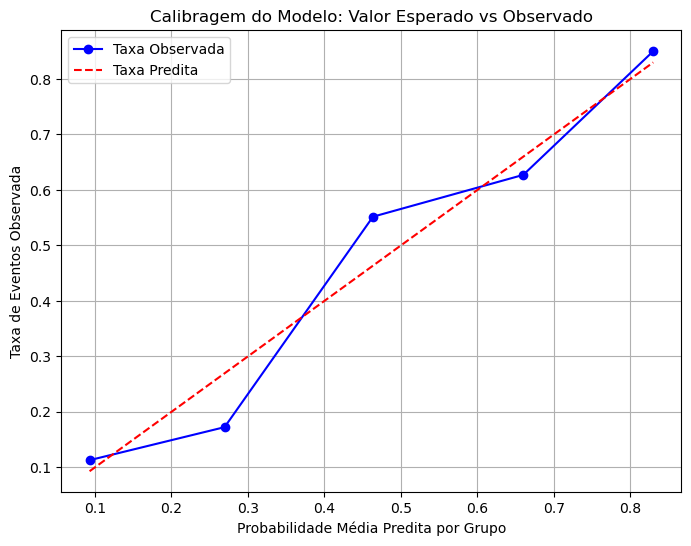

In [50]:
# Passo 1: Calculando a probabilidade de evento predita:
df_model['pred_prob'] = resultado.predict()

# Passo 2: Categorizando as probabilidades em 5 grupos:
df_model['prob_group'] = pd.qcut(df_model['pred_prob'], q=5, labels=False)

# Passo 3: Calculando a probabilidade média predita por grupo:
pred_prob_media = df_model.groupby('prob_group')['pred_prob'].mean()

# Passo 4: Calculando a taxa de eventos (média de 'flag_doente') por grupo:
taxa_eventos = df_model.groupby('prob_group')['flag_doente'].mean()

# Passo 5: Comparação gráfica:
plt.figure(figsize=(8,6))
plt.plot(pred_prob_media, taxa_eventos, marker='o', linestyle='-', color='b', label='Taxa Observada')
plt.plot(pred_prob_media, pred_prob_media, linestyle='--', color='r', label='Taxa Predita')
plt.title('Calibragem do Modelo: Valor Esperado vs Observado')
plt.xlabel('Probabilidade Média Predita por Grupo')
plt.ylabel('Taxa de Eventos Observada')
plt.legend()
plt.grid(True)
plt.show()


_____

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Passo 1: Calculando a acurácia com ponto de corte de 0.5:
y_pred_class = (df_model['pred_prob'] >= 0.5).astype(int)
accuracy = accuracy_score(df_model['flag_doente'], y_pred_class)

# Passo 2: Calculando o AUC e o GINI:
auc = roc_auc_score(df_model['flag_doente'], df_model['pred_prob'])
gini = 2 * auc - 1

# Passo 3: Calculando o KS:
fpr, tpr, thresholds = roc_curve(df_model['flag_doente'], df_model['pred_prob'])
ks = max(tpr - fpr)

# Resultados:
print(f"Acurácia: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"GINI: {gini:.4f}")
print(f"KS: {ks:.4f}")


Acurácia: 0.7306
AUC: 0.8167
GINI: 0.6333
KS: 0.5197


____________

6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

##### Aqui podemos adotar os seguintes critérios:

1. Inserir novas variáveis: adiconar variáveis que podem ter correlação com o desfecho (ex.: outras variáveis dummies de categorias relevantes).
2. Remover variáveis: excluir variáveis que não contribuem significativamente para o modelo.
3. Transformações de variáveis: usar interações entre variáveis ou transformações não-lineares para melhorar a capacidade preditiva do modelo.

In [61]:
# Visualizando todas as colunas disponíveis no DataFrame para identificar novas variáveis:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'flag_doente'],
      dtype='object')


In [63]:
# Definindo variáveis adicionais ou removidas:
df_dummies = pd.get_dummies(df[['sex', 'cp', 'thal', 'exang']], drop_first=True)  # Exemplo de novas variáveis
df_model = pd.concat([df_dummies, df[['age', 'chol', 'trestbps', 'flag_doente']]], axis=1)

# Definindo as variáveis independentes (X) e dependente (y):
X = df_model.drop(columns=['flag_doente'])
y = df_model['flag_doente']

# Adicionando constante para o modelo:
X = sm.add_constant(X)

# Ajustando o novo modelo de Regressão Logística:
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Resumo do modelo ajustado:
print(resultado.summary())


Optimization terminated successfully.
         Current function value: 0.435905
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            7
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:                  0.3684
Time:                        22:54:03   Log-Likelihood:                -129.46
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.480e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1407      1.834     -6.075      0.000     -14.735      -7.546
sex            1.2114      0.

In [65]:
# Calculando as probabilidades preditas do novo modelo:
df_model['pred_prob'] = resultado.predict(X)

# Calculando a acurácia, GINI e KS novamente:
y_pred_class = (df_model['pred_prob'] >= 0.5).astype(int)
accuracy = accuracy_score(df_model['flag_doente'], y_pred_class)
auc = roc_auc_score(df_model['flag_doente'], df_model['pred_prob'])
gini = 2 * auc - 1
fpr, tpr, thresholds = roc_curve(df_model['flag_doente'], df_model['pred_prob'])
ks = max(tpr - fpr)

# Exibindo os resultados:
print(f"Acurácia: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"GINI: {gini:.4f}")
print(f"KS: {ks:.4f}")


Acurácia: 0.8114
AUC: 0.8765
GINI: 0.7530
KS: 0.6457


##### Percebemos uma melhora na acurácia, por exemplo, com relação ao modelo anterior.

#### Gráficos para melhor visualização:

Gráfico 1: Calibragem do Modelo:

C:\Users\User\AppData\Local\Temp\ipykernel_12200\3545404337.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibragem = df_model.groupby('pred_prob_group').agg({'pred_prob': 'mean', 'flag_doente': 'mean'}).reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_ol

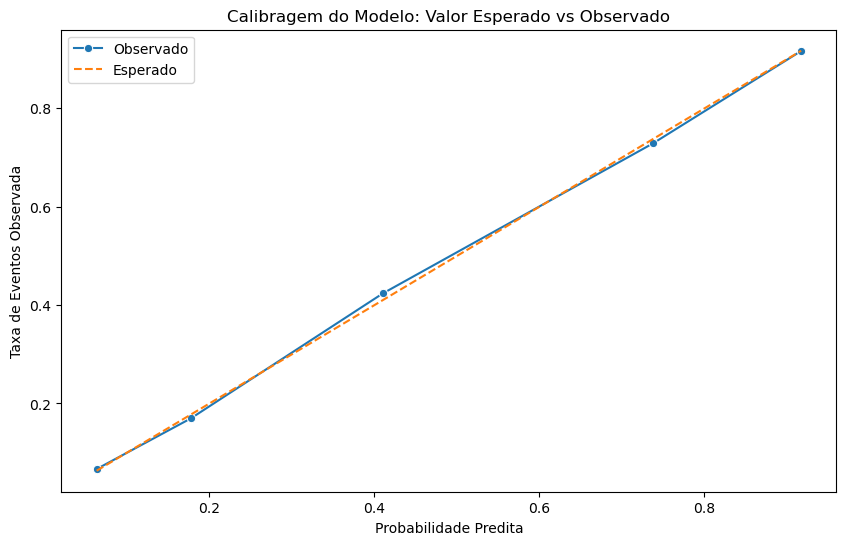

In [71]:
# Agrupando as probabilidades preditas em 5 grupos
df_model['pred_prob_group'] = pd.qcut(df_model['pred_prob'], q=5)

# Calcular a média da probabilidade prevista e a taxa de eventos observada por grupo
calibragem = df_model.groupby('pred_prob_group').agg({'pred_prob': 'mean', 'flag_doente': 'mean'}).reset_index()

# Gráfico da calibragem
plt.figure(figsize=(10, 6))
sns.lineplot(x=calibragem['pred_prob'], y=calibragem['flag_doente'], marker='o', label='Observado')
sns.lineplot(x=calibragem['pred_prob'], y=calibragem['pred_prob'], linestyle='--', label='Esperado')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Taxa de Eventos Observada')
plt.title('Calibragem do Modelo: Valor Esperado vs Observado')
plt.legend()
plt.show()


Gráfico 2: Curva ROC e KS:

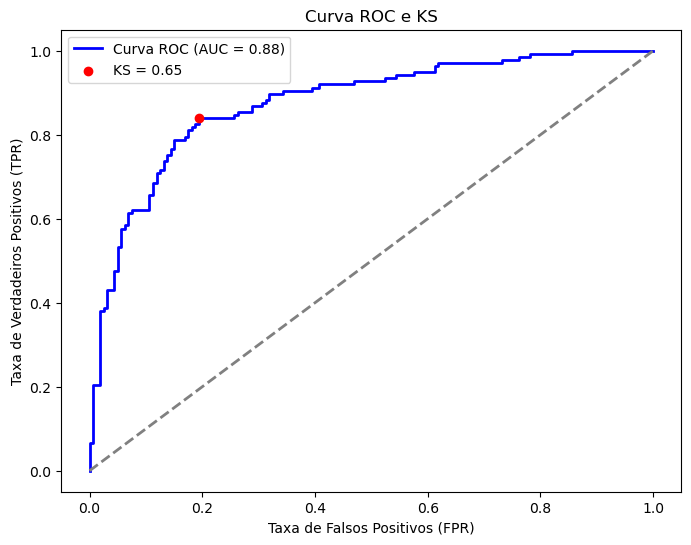

In [76]:
# Curva ROC:
fpr, tpr, thresholds = roc_curve(df_model['flag_doente'], df_model['pred_prob'])
roc_auc = auc(fpr, tpr)

# Gráfico da curva ROC:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC e KS')
plt.legend(loc='lower right')

# Destacando o ponto KS:
ks_value = max(tpr - fpr)
ks_index = (tpr - fpr).argmax()
plt.scatter(fpr[ks_index], tpr[ks_index], color='red', label=f'KS = {ks_value:.2f}', zorder=5)
plt.legend()
plt.show()


Gráfico 3: Distribuição de Probabilidades Preditas (Para Visualizar a Discriminação):

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


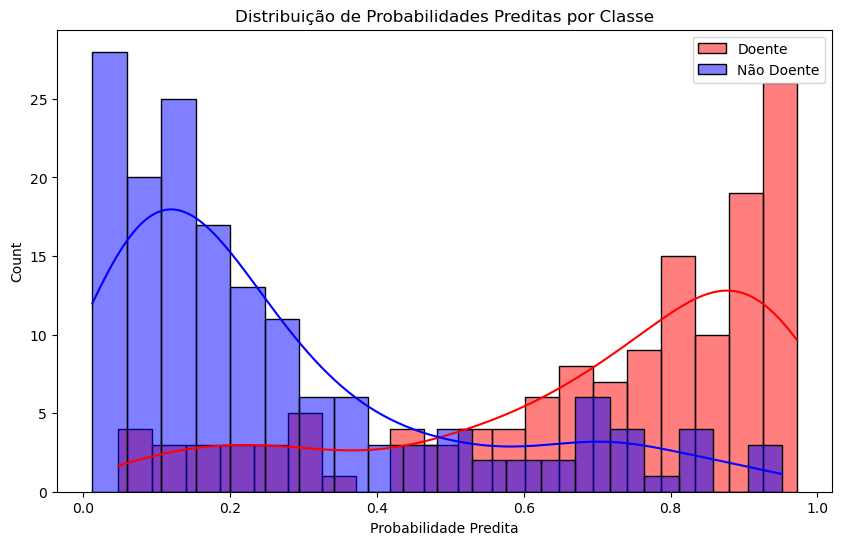

In [80]:
# Gráfico de distribuição de probabilidades preditas para as duas classes
plt.figure(figsize=(10, 6))
sns.histplot(df_model[df_model['flag_doente'] == 1]['pred_prob'], color='red', kde=True, label='Doente', bins=20)
sns.histplot(df_model[df_model['flag_doente'] == 0]['pred_prob'], color='blue', kde=True, label='Não Doente', bins=20)
plt.xlabel('Probabilidade Predita')
plt.title('Distribuição de Probabilidades Preditas por Classe')
plt.legend()
plt.show()


##### Observação: esses gráficos nos permitem uma visualização mais clara da performance do modelo, tanto na calibragem quanto na discriminação. Eles são úteis para entendermos como o modelo se comporta em termos de previsão de eventos e não eventos.

____________